In [1]:
import pandas as pd
mvc = pd.read_csv("nypd_mvc_2018.csv")

print(mvc)

       unique_key        date   time    borough                location  \
0         3869058  2018-03-23  21:40  MANHATTAN  (40.742832, -74.00771)   
1         3847947  2018-02-13  14:45   BROOKLYN  (40.623714, -73.99314)   
2         3914294  2018-06-04   0:00        NaN   (40.591755, -73.9083)   
3         3915069  2018-06-05   6:36     QUEENS   (40.73602, -73.87954)   
4         3923123  2018-06-16  15:45      BRONX  (40.884727, -73.89945)   
...           ...         ...    ...        ...                     ...   
57859     3835191  2018-01-26  14:51      BRONX   (40.85477, -73.90299)   
57860     3890674  2018-04-29  18:30     QUEENS   (40.78419, -73.84582)   
57861     3946458  2018-07-21  16:45        NaN   (40.711926, -74.0061)   
57862     3914574  2018-06-04   5:45        NaN   (40.71976, -73.94476)   
57863     4034882  2018-11-29   8:26        NaN  (40.69181, -73.988235)   

                              on_street     cross_street  \
0      WEST 15 STREET                  

In [3]:
import numpy as np

In [4]:
data = np.random.choice([1.0, np.nan],
                        size=(3, 3),
                        p=[.3, .7])
df = pd.DataFrame(data, columns=['A','B','C'])
print(df)

    A    B    C
0 NaN  1.0  1.0
1 NaN  NaN  NaN
2 NaN  1.0  NaN


In [5]:
print(df.isnull())

      A      B      C
0  True  False  False
1  True   True   True
2  True  False   True


In [6]:
print(df.isnull().sum())

A    3
B    1
C    2
dtype: int64


In [7]:
mvc = pd.read_csv("nypd_mvc_2018.csv")
null_counts = mvc.isnull().sum()

In [8]:
mvc.head()

,unique_key,date,time,borough,location,on_street,cross_street,off_street,pedestrians_injured,cyclist_injured,...,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
0,3869058,2018-03-23,21:40,MANHATTAN,"(40.742832, -74.00771)",WEST 15 STREET,10 AVENUE,NaN,0,0,...,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN
1,3847947,2018-02-13,14:45,BROOKLYN,"(40.623714, -73.99314)",16 AVENUE,62 STREET,NaN,0,0,...,SPORT UTILITY / STATION WAGON,DS,NaN,NaN,NaN,Backing Unsafely,Unspecified,NaN,NaN,NaN
2,3914294,2018-06-04,0:00,NaN,"(40.591755, -73.9083)",BELT PARKWAY,NaN,NaN,0,0,...,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN
3,3915069,2018-06-05,6:36,QUEENS,"(40.73602, -73.87954)",GRAND AVENUE,VANLOON STREET,NaN,0,0,...,Sedan,Sedan,NaN,NaN,NaN,Glare,Passing Too Closely,NaN,NaN,NaN
4,3923123,2018-06-16,15:45,BRONX,"(40.884727, -73.89945)",NaN,NaN,208 WEST 238 STREET,0,0,...,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,Turning Improperly,Unspecified,NaN,NaN,NaN


In [9]:
null_counts

unique_key                 0
date                       0
time                       0
borough                20646
location                3885
on_street              13961
cross_street           29249
off_street             44093
pedestrians_injured        0
cyclist_injured            0
motorist_injured           0
total_injured              1
pedestrians_killed         0
cyclist_killed             0
motorist_killed            0
total_killed               5
vehicle_1                355
vehicle_2              12262
vehicle_3              54352
vehicle_4              57158
vehicle_5              57681
cause_vehicle_1          175
cause_vehicle_2         8692
cause_vehicle_3        54134
cause_vehicle_4        57111
cause_vehicle_5        57671
dtype: int64

In [11]:
killed_cols = [col for col in mvc.columns if 'killed' in col]
killed = mvc[killed_cols].copy()
killed_manual_sum = killed.iloc[:,:3].sum(axis=1)
killed_mask = killed_manual_sum != killed['total_killed']
killed_non_eq = killed[killed_mask]

In [12]:
killed_non_eq


,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
3508,0,0,0,NaN
20163,0,0,0,NaN
22046,0,0,1,0.0
48719,0,0,0,NaN
55148,0,0,0,NaN
55699,0,0,0,NaN


In [13]:
killed_null = killed['total_killed'].isnull()
killed['total_killed'] = killed['total_killed'].mask(killed_null, killed_manual_sum)

In [17]:
killed['total_killed'] = killed['total_killed'].mask(killed['total_killed'] != killed_manual_sum, np.nan)

In [18]:
killed['total_killed']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
57859    0.0
57860    0.0
57861    0.0
57862    0.0
57863    0.0
Name: total_killed, Length: 57864, dtype: float64

In [19]:
print(killed[killed_mask])

       pedestrians_killed  cyclist_killed  motorist_killed  total_killed
3508                    0               0                0           0.0
20163                   0               0                0           0.0
22046                   0               0                1           NaN
48719                   0               0                0           0.0
55148                   0               0                0           0.0
55699                   0               0                0           0.0


In [20]:
injured = mvc[[col for col in mvc.columns if 'injured' in col]].copy()
injured_manual_sum = injured.iloc[:,:3].sum(axis=1)
injured['total_injured'] = injured['total_injured'].mask(injured['total_injured'].isnull(), injured_manual_sum)
injured['total_injured'] = injured['total_injured'].mask(injured['total_injured'] != injured_manual_sum, np.nan)

In [21]:
injured['total_injured']

0        0.0
1        0.0
2        1.0
3        0.0
4        0.0
        ... 
57859    3.0
57860    0.0
57861    1.0
57862    0.0
57863    0.0
Name: total_injured, Length: 57864, dtype: float64

In [22]:
summary = {
    'injured': [
        mvc['total_injured'].isnull().sum(),
        injured['total_injured'].isnull().sum()
    ],
    'killed': [
        mvc['total_killed'].isnull().sum(),
        killed['total_killed'].isnull().sum()
    ]
}
print(pd.DataFrame(summary, index=['before','after']))

        injured  killed
before        1       5
after        21       1


In [24]:
print(mvc['total_killed'].isnull().sum())

5


In [25]:
mvc['total_injured'] = injured['total_injured']
mvc['total_killed'] = killed['total_killed']

In [26]:
def plot_null_matrix(df, figsize=(18,15)):
    # initiate the figure
    plt.figure(figsize=figsize)
    # create a boolean dataframe based on whether values are null
    df_null = df.isnull()
    # create a heatmap of the boolean dataframe
    sns.heatmap(~df_null, cbar=False, yticklabels=False)
    plt.xticks(rotation=90, size='x-large')
    plt.show()

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_null_correlations(df):
    # create a correlation matrix only for columns with at least
    # one missing value
    cols_with_missing_vals = df.columns[df.isnull().sum() > 0]
    missing_corr = df[cols_with_missing_vals].isnull().corr()
    
    # create a triangular mask to avoid repeated values and make
    # the plot easier to read
    missing_corr = missing_corr.iloc[1:, :-1]
    mask = np.triu(np.ones_like(missing_corr), k=1)
    
    # plot a heatmap of the values
    plt.figure(figsize=(20,14))
    ax = sns.heatmap(missing_corr, vmin=-1, vmax=1, cbar=False,
                     cmap='RdBu', mask=mask, annot=True)
    
    # format the text in the plot to make it easier to read
    for text in ax.texts:
        t = float(text.get_text())
        if -0.05 < t < 0.01:
            text.set_text('')
        else:
            text.set_text(round(t, 2))
        text.set_fontsize('x-large')
    plt.xticks(rotation=90, size='x-large')
    plt.yticks(rotation=0, size='x-large')

    plt.show()
veh_cols = [c for c in mvc.columns if 'vehicle' in c]
plot_null_correlations(mvc[veh_cols])

<Figure size 2000x1400 with 1 Axes>

In [29]:
plt.show()

In [30]:
col_labels = ['v_number', 'vehicle_missing', 'cause_missing']

vc_null_data = []

# for v in range(1,6):
#     v_col = 'vehicle_{}'.format(v)
#     c_col = 'cause_vehicle_{}'.format(v)
for v in range(1,6):
    v_col = 'vehicle_{}'.format(v)
    c_col = 'cause_vehicle_{}'.format(v)
    
    v_null = (mvc[v_col].isnull() & mvc[c_col].notnull()).sum()
    c_null = (mvc[c_col].isnull() & mvc[v_col].notnull()).sum()
    
    vc_null_data.append([v, v_null, c_null])

vc_null_df = pd.DataFrame(vc_null_data, columns=col_labels)

In [31]:
vc_null_df

,v_number,vehicle_missing,cause_missing
0,1,204,24
1,2,3793,223
2,3,242,24
3,4,50,3
4,5,10,0


In [32]:
v_cols = [c for c in mvc.columns if c.startswith("vehicle")]
v_cols = [c for c in mvc.columns if c.startswith("vehicle")]
vehicles = mvc[v_cols]
vehicles_1d = vehicles.stack()
vehicles_counts = vehicles_1d.value_counts()
top10_vehicles = vehicles_counts.head(10)

In [33]:
top10_vehicles

Sedan                                  33133
Station Wagon/Sport Utility Vehicle    26124
PASSENGER VEHICLE                      16026
SPORT UTILITY / STATION WAGON          12356
Taxi                                    3482
Pick-up Truck                           2373
TAXI                                    1892
Box Truck                               1659
Bike                                    1190
Bus                                     1162
dtype: int64

In [41]:
def summarize_missing():
    v_missing_data = []

    for v in range(1,6):
        v_col = 'vehicle_{}'.format(v)
        c_col = 'cause_vehicle_{}'.format(v)

        v_missing = (mvc[v_col].isnull() & mvc[c_col].notnull()).sum()
        c_missing = (mvc[c_col].isnull() & mvc[v_col].notnull()).sum()

        v_missing_data.append([v, v_missing, c_missing])

    col_labels = columns=["vehicle_number", "vehicle_missing", "cause_missing"]
    return pd.DataFrame(v_missing_data, columns=col_labels)

summary_before = summarize_missing()
for v in range(1,6):
    v_col = 'vehicle_{}'.format(v)
    c_col = 'cause_vehicle_{}'.format(v)
    
    v_missing_mask = mvc[v_col].isnull() & mvc[c_col].notnull()
    c_missing_mask = mvc[c_col].isnull() & mvc[v_col].notnull()

    mvc[v_col] = mvc[v_col].mask(v_missing_mask, "Unspecified")
    mvc[c_col] = mvc[c_col].mask(c_missing_mask, "Unspecified")
    
summary_after = summarize_missing()


# for v in range(1,6):
#     v_col = 'vehicle_{}'.format(v)

In [39]:
mvc[v_col]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
57859    NaN
57860    NaN
57861    NaN
57862    NaN
57863    NaN
Name: vehicle_5, Length: 57864, dtype: object

In [40]:
 mvc[c_col]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
57859    NaN
57860    NaN
57861    NaN
57862    NaN
57863    NaN
Name: cause_vehicle_5, Length: 57864, dtype: object

In [42]:
summary_after

,vehicle_number,vehicle_missing,cause_missing
0,1,0,0
1,2,0,0
2,3,0,0
3,4,0,0
4,5,0,0


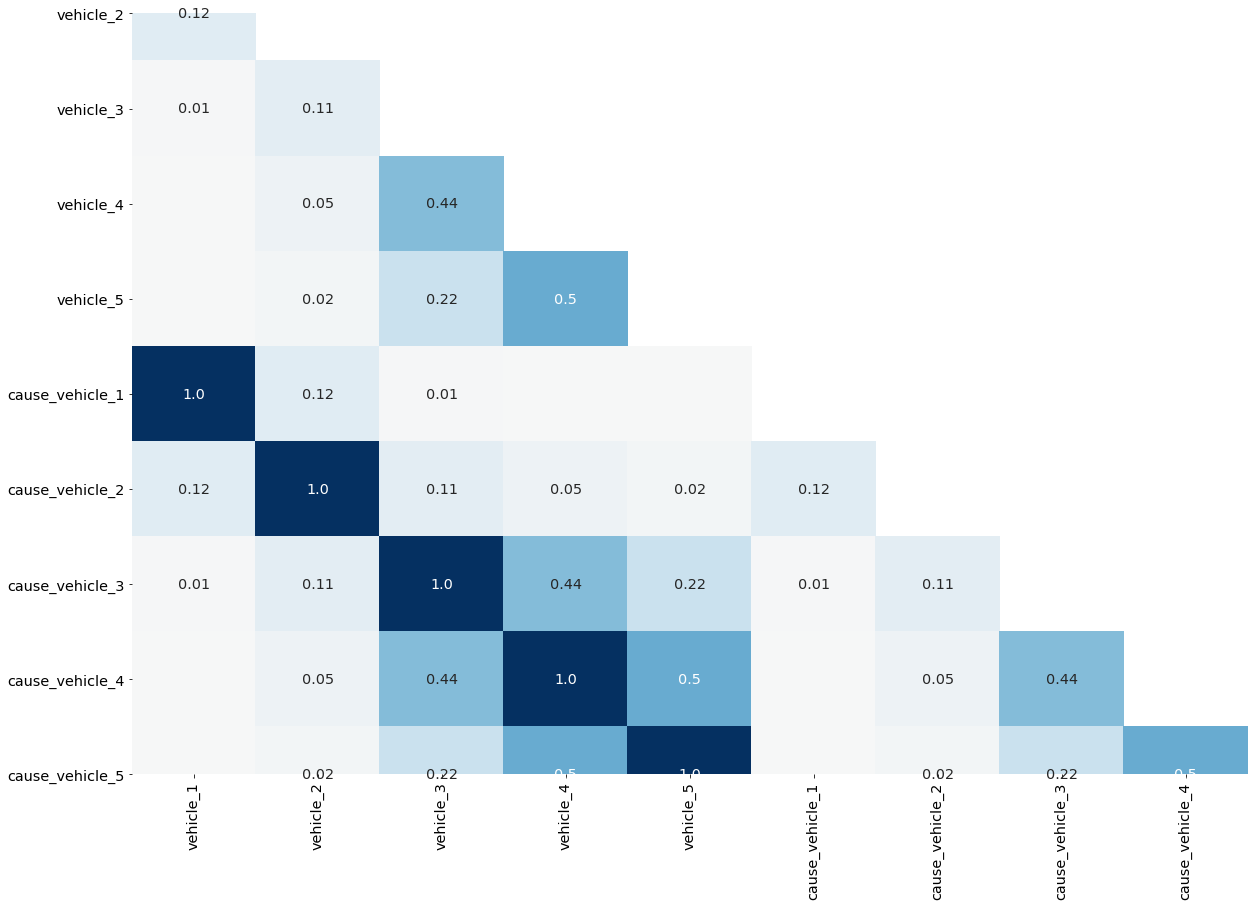

In [43]:
veh_cols = [c for c in mvc.columns if 'vehicle' in c]
plot_null_correlations(mvc[veh_cols])

In [47]:
sup_data = pd.read_csv('supplemental_data.csv')
sup_data.head()

,unique_key,location,on_street,off_street,borough
0,3869058,NaN,NaN,NaN,NaN
1,3847947,NaN,NaN,NaN,NaN
2,3914294,NaN,BELT PARKWAY,NaN,BROOKLYN
3,3915069,NaN,NaN,NaN,NaN
4,3923123,NaN,NaN,NaN,NaN


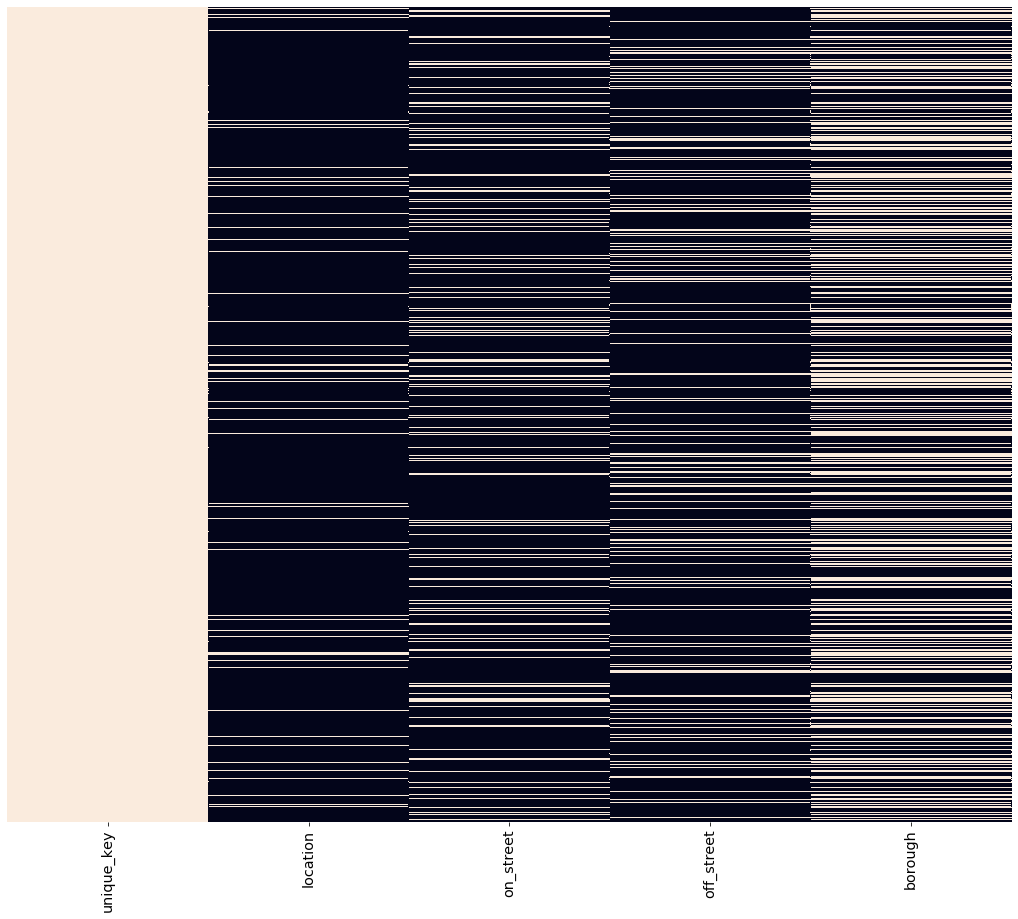

In [48]:
plot_null_matrix(sup_data)

In [49]:
mvc_keys = mvc['unique_key']
sup_keys = sup_data['unique_key']

is_equal = mvc_keys.equals(sup_keys)
print(is_equal)

True


In [50]:
sup_data = pd.read_csv('supplemental_data.csv')

location_cols = ['location', 'on_street', 'off_street', 'borough']
null_before = mvc[location_cols].isnull().sum()
for col in location_cols:
    mvc[col] = mvc[col].mask(mvc[col].isnull(), sup_data[col])

null_after = mvc[location_cols].isnull().sum()

In [51]:
null_after

location         77
on_street     13734
off_street    36131
borough         232
dtype: int64